In [1]:
import pandas as pd
from h5py import File as H5File
from scipy.interpolate import interp1d 
import numpy as np
import sys
from os import remove


In [20]:

fields = fp.keys()
sensors = ["IDH", "VDH", "PCAS", "PINP", "PTUB", "YRUN"]

dontdel = '/home/ubuntu/data/esp_data_offline.h5'

#remove("new_data.h5")
gp = H5File("new_data.h5","w")

with H5File(dontdel, "r")  as fp:

#    for field in fp.keys():
#        for well in fp[field].keys():
    for field in ['1']:
        
        for well in fp[field].keys():
            
            print (field, well)
            
            tmin = 0
            tmax = np.int(1E+16)            
                                                
            for sensor in sensors:

               if(sensor in fp[field][well].keys()):
                    
                    times = fp[field][well][sensor][:,0]
                    values = fp[field][well][sensor][:,1]
                    
                    indx = np.argsort(times)
                    
                    times = times[indx]
                    values = values[indx]
                    
                    if (times[0] > tmin):
                        tmin = times[0]
                        
                    if (times[-1] < tmax):
                        tmax = times[-1]
                        
            all_times = np.arange(tmin, tmax)
            
            all_data = np.empty((len(all_times),len(sensors)+1))                
            all_data[:] = np.nan
                
            all_data[:,0] = all_times
            
            if(len(all_times) < 1000):
                continue 
                
            for i in range(len(sensors)):
                
               sensor = sensors[i] 
               if(sensor in fp[field][well].keys()):
                      
                    times = fp[field][well][sensor][:,0]
                    values = fp[field][well][sensor][:,1]
                    
                    indx = np.argsort(times)
                    
                    times = times[indx]
                    values = values[indx]
                              
                                                                                                                                                                                            
                    f = interp1d(times, values)
                        
                    result =  f(all_times)
                    
                    all_data[:,i+1] = result
                                       
            gp.create_dataset("/%s/%s" % (field, well), data=all_data)
gp.close()                
                      



1 1


In [2]:

import matplotlib.pylab as plt
from scipy.signal import medfilt

with H5File("new_data.h5", "r")  as fp:
    data =  fp["/1/1"][:10000]
    
idh = medfilt(data[:,1], 101)
vdh = medfilt(data[:,2], 101)







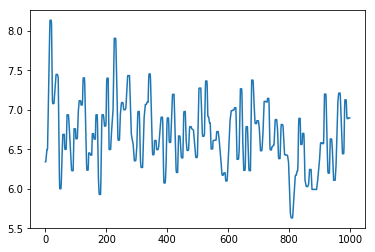

In [5]:
plt.plot(idh[::10])
plt.plot(vdh[::10])
plt.show()

In [6]:
import statsmodels.tsa.stattools as ts

coin_result = ts.coint(idh, vdh) 







/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
print (coin_result)

(-6.913524928402345, 1.376495207496058e-08, array([-3.89753563, -3.33674114, -3.04487419]))


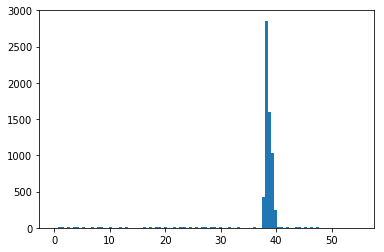

In [38]:
plt.hist(data[::1000,1],100)
plt.show()